In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
df=pd.read_csv("twitchdata-update.csv")

In [2]:
df.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [3]:
df.shape

(1000, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


In [145]:
df.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,9.970000e+02,997.000000,997.000000,997.000000,9.970000e+02,9.970000e+02,9.970000e+02
mean,4.145396e+08,120716.915747,36164.158475,4501.685055,5.700505e+05,2.054796e+05,1.100274e+07
std,5.423376e+08,85346.601374,57181.413783,6008.184833,8.056157e+05,3.403296e+05,1.365196e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631328e+08,73935.000000,9110.000000,1457.000000,1.701810e+05,4.342600e+04,3.880016e+06
50%,2.343077e+08,108375.000000,16622.000000,2413.000000,3.171250e+05,9.769600e+04,6.445996e+06
75%,4.282792e+08,141705.000000,37216.000000,4714.000000,6.223580e+05,2.361180e+05,1.208972e+07
max,6.196162e+09,521445.000000,639375.000000,53986.000000,8.938903e+06,3.966525e+06,1.153130e+08


In [3]:
df.isnull().sum()

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64

In [3]:
print(df.corr())

                      Watch time(Minutes)  Stream time(minutes)  Peak viewers  \
Watch time(Minutes)              1.000000              0.150588      0.582797   
Stream time(minutes)             0.150588              1.000000     -0.119540   
Peak viewers                     0.582797             -0.119540      1.000000   
Average viewers                  0.476165             -0.249248      0.682637   
Followers                        0.620234             -0.091299      0.532529   
Followers gained                 0.514648             -0.158165      0.470415   
Views gained                     0.529862              0.064370      0.298063   
Partnered                        0.038258             -0.007073      0.028112   
Mature                          -0.043197              0.044978     -0.082750   

                      Average viewers  Followers  Followers gained  \
Watch time(Minutes)          0.476165   0.620234          0.514648   
Stream time(minutes)        -0.249248  -0.091299 

<AxesSubplot:>

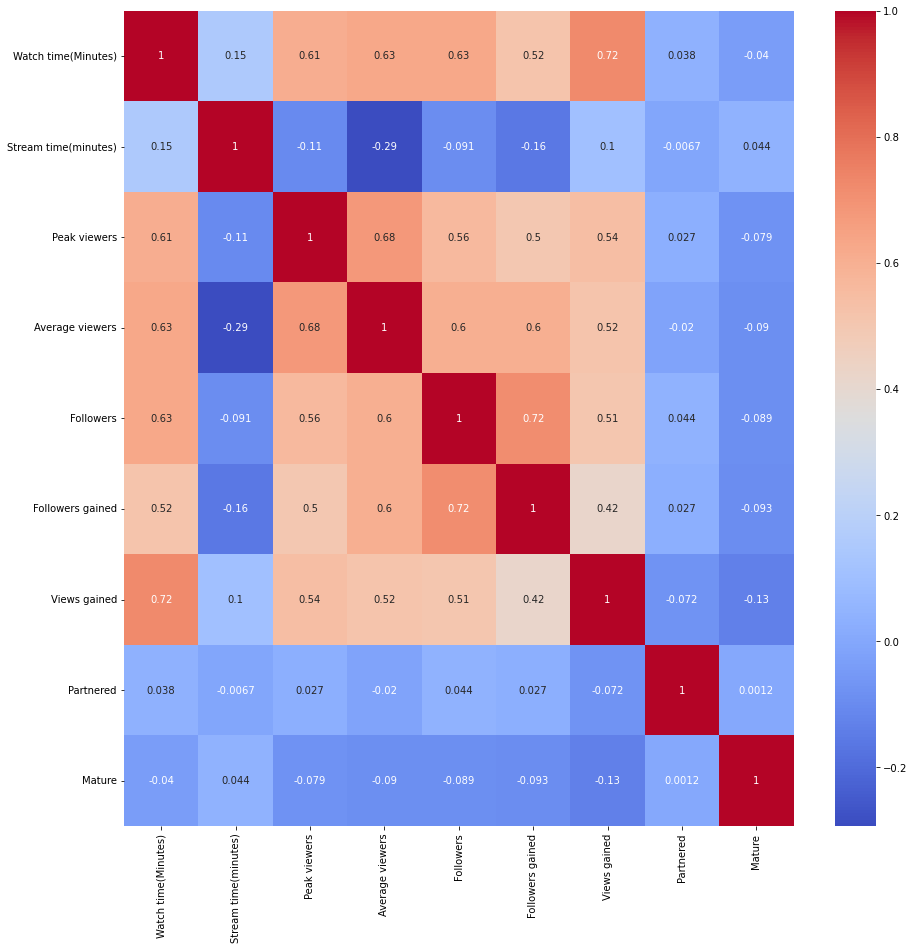

In [146]:
plt.figure(figsize=(15,15))
correlation=df.corr()
sns.heatmap(correlation,annot=True, cmap='coolwarm')

(array([745., 135.,  43.,  27.,  22.,   8.,   3.,   3.,   4.,   2.,   1.,
          2.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   2.]),
 array([1.22192850e+08, 4.25891295e+08, 7.29589740e+08, 1.03328818e+09,
        1.33698663e+09, 1.64068508e+09, 1.94438352e+09, 2.24808196e+09,
        2.55178041e+09, 2.85547886e+09, 3.15917730e+09, 3.46287574e+09,
        3.76657419e+09, 4.07027264e+09, 4.37397108e+09, 4.67766952e+09,
        4.98136797e+09, 5.28506642e+09, 5.58876486e+09, 5.89246330e+09,
        6.19616175e+09]),
 <BarContainer object of 20 artists>)

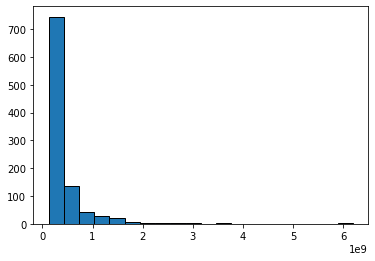

In [83]:
plt.hist(df['Watch time(Minutes)'], edgecolor='black', bins=20)

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Watch time(Minutes)'>

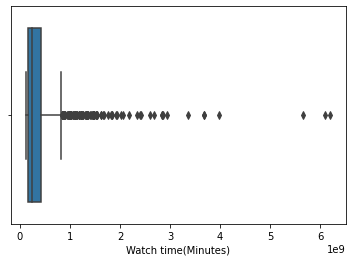

In [84]:
sns.boxplot(df['Watch time(Minutes)'])

In [78]:
df['Watch time(Minutes)'].quantile([.5,.75,.95,.99])

0.50    2.347261e+08
0.75    4.312714e+08
0.95    1.325130e+09
0.99    2.832960e+09
Name: Watch time(Minutes), dtype: float64

In [123]:
df[df['Watch time(Minutes)']>150000000].describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,8.200000e+02,820.000000,820.000000,820.000000,8.200000e+02,8.200000e+02,8.200000e+02
mean,4.749675e+08,123944.560976,40523.941463,4997.830488,6.352328e+05,2.268066e+05,1.229665e+07
std,5.805933e+08,86883.955317,61544.332973,6324.429759,8.653455e+05,3.668331e+05,1.424602e+07
min,1.501503e+08,6135.000000,1182.000000,313.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.951930e+08,76530.000000,10439.000000,1696.750000,1.952870e+05,4.837375e+04,4.750506e+06
50%,2.839171e+08,110895.000000,19228.000000,2775.500000,3.585520e+05,1.119235e+05,7.492743e+06
75%,5.160355e+08,145871.250000,43078.500000,5311.500000,7.268122e+05,2.508828e+05,1.355770e+07
max,6.196162e+09,521445.000000,639375.000000,53986.000000,8.938903e+06,3.966525e+06,1.153130e+08


In [82]:
df[df['Watch time(Minutes)']>1500000000]

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
5,Asmongold,3668799075,82260,263720,42414,1563438,554201,61715781,True,False,English
6,NICKMERCS,3360675195,136275,115633,24181,4074287,1089824,46084211,True,False,English
8,loltyler1,2928356940,122490,89387,22381,3530767,951730,51349926,True,False,English
9,Anomaly,2865429915,92880,125408,12377,2607076,1532689,36350662,True,False,English
10,TimTheTatman,2834436990,108780,142067,25664,5265659,1244341,50119786,True,True,English


(array([ 58., 101., 136., 193., 194., 143.,  74.,  33.,  17.,   6.,   3.,
          2.,   4.,   4.,   4.,   1.,   1.,   2.,   4.,  20.]),
 array([  3465.,  29364.,  55263.,  81162., 107061., 132960., 158859.,
        184758., 210657., 236556., 262455., 288354., 314253., 340152.,
        366051., 391950., 417849., 443748., 469647., 495546., 521445.]),
 <BarContainer object of 20 artists>)

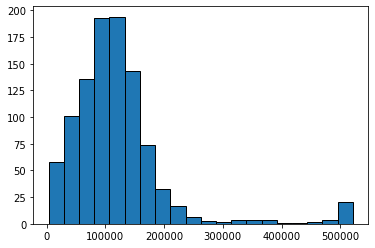

In [7]:
plt.hist(df['Stream time(minutes)'], edgecolor='black', bins=20)

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stream time(minutes)'>

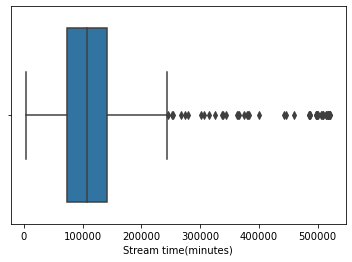

In [13]:
sns.boxplot(df['Stream time(minutes)'])

(array([716., 141.,  54.,  35.,  17.,   9.,   5.,   5.,   4.,   5.,   2.,
          1.,   1.,   0.,   2.,   1.,   1.,   0.,   0.,   1.]),
 array([4.9600000e+02, 3.2439950e+04, 6.4383900e+04, 9.6327850e+04,
        1.2827180e+05, 1.6021575e+05, 1.9215970e+05, 2.2410365e+05,
        2.5604760e+05, 2.8799155e+05, 3.1993550e+05, 3.5187945e+05,
        3.8382340e+05, 4.1576735e+05, 4.4771130e+05, 4.7965525e+05,
        5.1159920e+05, 5.4354315e+05, 5.7548710e+05, 6.0743105e+05,
        6.3937500e+05]),
 <BarContainer object of 20 artists>)

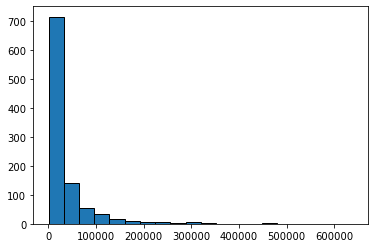

In [8]:
plt.hist(df['Peak viewers'], edgecolor='black', bins=20)

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Peak viewers'>

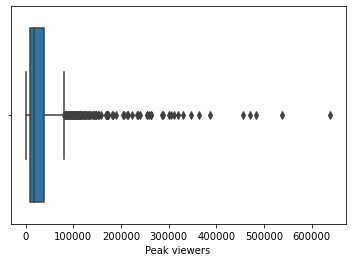

In [2]:
sns.boxplot(df['Peak viewers'])

(array([857.,  87.,  24.,  19.,   6.,   3.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([   235. ,   7605.4,  14975.8,  22346.2,  29716.6,  37087. ,
         44457.4,  51827.8,  59198.2,  66568.6,  73939. ,  81309.4,
         88679.8,  96050.2, 103420.6, 110791. , 118161.4, 125531.8,
        132902.2, 140272.6, 147643. ]),
 <BarContainer object of 20 artists>)

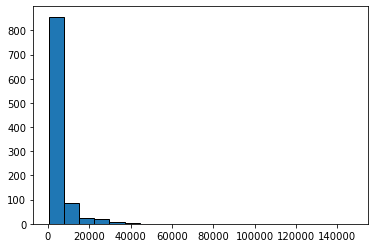

In [11]:
plt.hist(df['Average viewers'], edgecolor='black', bins=20)

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Average viewers'>

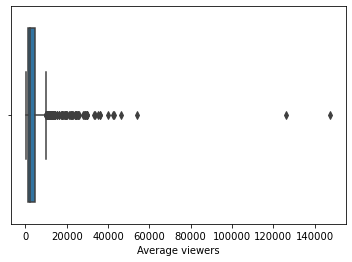

In [3]:
sns.boxplot(df['Average viewers'])

In [64]:
df['Average viewers'].quantile([.5,.75,.95,.99])

0.50     2419.00
0.75     4752.00
0.95    17066.80
0.99    33550.38
Name: Average viewers, dtype: float64

In [67]:
df[df['Average viewers']>50000].describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,3.000000e+00,3.00000,3.000000,3.000000,3.000000e+00,3.000000e+00,3.000000e+00
mean,1.413379e+09,17695.00000,370235.000000,109287.000000,1.729596e+06,1.398795e+06,2.327042e+07
std,8.691855e+08,19814.75208,173813.624394,49074.007183,1.953186e+06,2.223729e+06,1.593644e+07
min,8.125381e+08,6195.00000,170115.000000,53986.000000,5.416440e+05,1.084380e+05,1.206838e+07
25%,9.150578e+08,6255.00000,313587.500000,90109.000000,6.024705e+05,1.149300e+05,1.414821e+07
50%,1.017578e+09,6315.00000,457060.000000,126232.000000,6.632970e+05,1.214220e+05,1.622804e+07
75%,1.713800e+09,23445.00000,470295.000000,136937.500000,2.323572e+06,2.043974e+06,2.887145e+07
max,2.410023e+09,40575.00000,483530.000000,147643.000000,3.983847e+06,3.966525e+06,4.151485e+07


In [68]:
df[df['Average viewers']>60000]

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
81,dota2ti,1017577605,6315,483530,147643,663297,121422,16228039,True,False,English
109,dota2ti_ru,812538090,6195,457060,126232,541644,108438,12068376,True,False,Russian


In [3]:
df.drop([81,109], axis=0, inplace=True)

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Average viewers'>

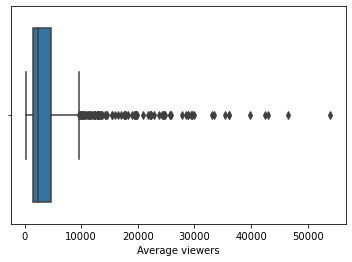

In [144]:
sns.boxplot(df['Average viewers'])

(array([632., 215.,  64.,  35.,  16.,   8.,   6.,   5.,   4.,   3.,   2.,
          2.,   2.,   0.,   0.,   1.,   0.,   1.,   0.,   1.]),
 array([3.66000000e+03, 4.50422150e+05, 8.97184300e+05, 1.34394645e+06,
        1.79070860e+06, 2.23747075e+06, 2.68423290e+06, 3.13099505e+06,
        3.57775720e+06, 4.02451935e+06, 4.47128150e+06, 4.91804365e+06,
        5.36480580e+06, 5.81156795e+06, 6.25833010e+06, 6.70509225e+06,
        7.15185440e+06, 7.59861655e+06, 8.04537870e+06, 8.49214085e+06,
        8.93890300e+06]),
 <BarContainer object of 20 artists>)

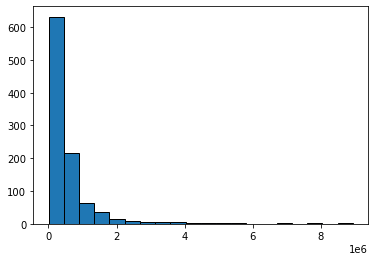

In [88]:
plt.hist(df['Followers'], edgecolor='black', bins=20)

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Followers'>

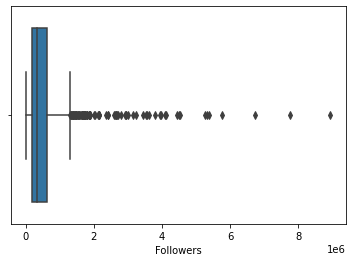

In [89]:
sns.boxplot(df['Followers'])

In [90]:
df['Followers'].quantile([.5,.75,.95,.99])

0.50     317125.0
0.75     622358.0
0.95    1793423.8
0.99    4128508.4
Name: Followers, dtype: float64

In [91]:
df[df['Followers']>1800000].describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,4.900000e+01,49.000000,49.000000,49.000000,4.900000e+01,4.900000e+01,4.900000e+01
mean,1.635315e+09,106946.632653,136593.040816,16738.673469,3.349804e+06,1.109455e+06,3.515366e+07
std,1.368912e+09,84128.831187,129883.320851,11050.842704,1.576286e+06,9.038244e+05,2.293467e+07
min,1.258124e+08,9555.000000,11782.000000,1816.000000,1.801697e+06,5.031200e+04,2.268382e+06
25%,6.679778e+08,57795.000000,56325.000000,7699.000000,2.138294e+06,5.506780e+05,1.918171e+07
50%,1.324519e+09,100470.000000,89706.000000,15483.000000,2.911316e+06,8.756780e+05,3.236212e+07
75%,2.408461e+09,134280.000000,169084.000000,23794.000000,3.983847e+06,1.454481e+06,4.651570e+07
max,6.196162e+09,517740.000000,639375.000000,53986.000000,8.938903e+06,3.966525e+06,1.065469e+08


(array([694., 172.,  55.,  35.,   9.,  11.,   4.,   6.,   3.,   2.,   2.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.]),
 array([ -15772.  ,  183342.85,  382457.7 ,  581572.55,  780687.4 ,
         979802.25, 1178917.1 , 1378031.95, 1577146.8 , 1776261.65,
        1975376.5 , 2174491.35, 2373606.2 , 2572721.05, 2771835.9 ,
        2970950.75, 3170065.6 , 3369180.45, 3568295.3 , 3767410.15,
        3966525.  ]),
 <BarContainer object of 20 artists>)

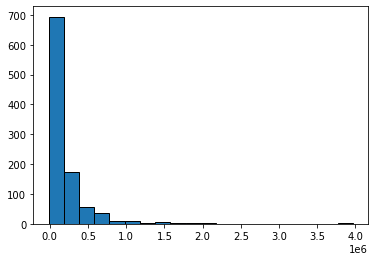

In [92]:
plt.hist(df['Followers gained'], edgecolor='black', bins=20)

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Followers gained'>

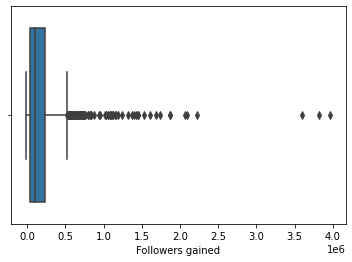

In [93]:
sns.boxplot(df['Followers gained'])

In [27]:
df['Followers gained'].quantile([.5,.75,.95,.99])

0.50      98352.00
0.75     236130.75
0.95     723135.85
0.99    1602946.35
Name: Followers gained, dtype: float64

In [38]:
df[df['Followers gained']>1700000]

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
13,Rubius,2588632635,58275,240096,42948,5751354,3820532,58599449,True,False,Spanish
14,auronplay,2410022550,40575,170115,53986,3983847,3966525,41514854,True,False,Spanish
25,TheGrefg,1757406750,54855,538444,28887,3795667,3593081,47094362,True,False,Spanish
40,Fresh,1464179820,147660,57431,9728,3135667,1875187,25341820,True,False,English
51,Bugha,1324519320,100470,66311,12982,2942212,2220765,49441744,True,False,English
90,pokimane,964334055,56505,112160,16026,5367605,2085831,45579002,True,False,English
669,SLAKUN10,179262330,9555,48358,18906,1874932,1874846,5835029,True,False,Spanish


In [94]:
df[df['Followers gained']>2500000]

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
13,Rubius,2588632635,58275,240096,42948,5751354,3820532,58599449,True,False,Spanish
14,auronplay,2410022550,40575,170115,53986,3983847,3966525,41514854,True,False,Spanish
25,TheGrefg,1757406750,54855,538444,28887,3795667,3593081,47094362,True,False,Spanish


In [39]:
df[df['Followers gained']>1700000].describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,9.000000e+00,9.000000,9.000000,9.000000,9.000000e+00,9.000000e+00,9.000000e+00
mean,2.283947e+09,89645.000000,193475.444444,26753.444444,4.337387e+06,2.582222e+06,4.949351e+07
std,1.781113e+09,63768.635217,155492.338450,14463.952789,2.100531e+06,9.240517e+05,2.603744e+07
min,1.792623e+08,9555.000000,48358.000000,9728.000000,1.874932e+06,1.734810e+06,5.835029e+06
25%,1.324519e+09,54855.000000,66311.000000,16026.000000,3.135667e+06,1.875187e+06,4.151485e+07
50%,1.757407e+09,58275.000000,170115.000000,27716.000000,3.795667e+06,2.085831e+06,4.709436e+07
75%,2.588633e+09,123660.000000,240096.000000,29602.000000,5.367605e+06,3.593081e+06,5.859945e+07
max,6.196162e+09,215250.000000,538444.000000,53986.000000,8.938903e+06,3.966525e+06,9.303674e+07


(array([938.,  48.,  10.,   3.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.75788000e+05, 3.36738760e+07, 6.71719640e+07, 1.00670052e+08,
        1.34168140e+08, 1.67666228e+08, 2.01164316e+08, 2.34662404e+08,
        2.68160492e+08, 3.01658580e+08, 3.35156668e+08, 3.68654756e+08,
        4.02152844e+08, 4.35650932e+08, 4.69149020e+08, 5.02647108e+08,
        5.36145196e+08, 5.69643284e+08, 6.03141372e+08, 6.36639460e+08,
        6.70137548e+08]),
 <BarContainer object of 20 artists>)

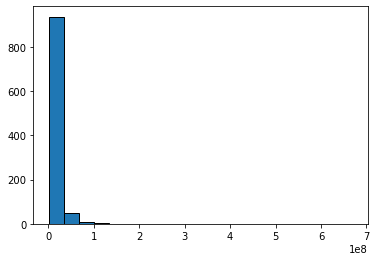

In [17]:
plt.hist(df['Views gained'], edgecolor='black', bins=20)

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Views gained'>

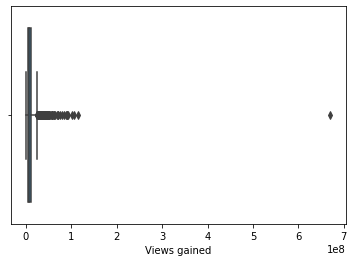

In [56]:
sns.boxplot(df['Views gained'])

In [57]:
df['Views gained'].quantile([.5,.75,.95,.99])

0.50     6456323.50
0.75    12196762.00
0.95    39340043.00
0.99    76253216.02
Name: Views gained, dtype: float64

In [4]:
df[df['Views gained']>150000000]

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
7,Fextralife,3301867485,147885,68795,18985,508816,425468,670137548,True,False,English


In [58]:
df.drop(7, axis=0, inplace=True)

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Views gained'>

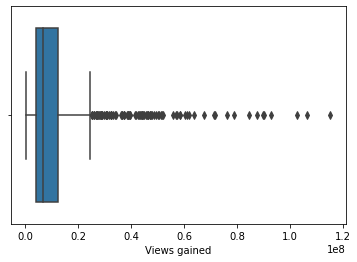

In [85]:
sns.boxplot(df['Views gained'])

<AxesSubplot:ylabel='Partnered'>

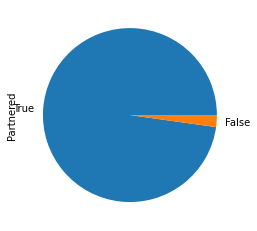

In [113]:
fig, ax = plt.subplots()
df['Partnered'].value_counts().plot(ax=ax, kind='pie')

<AxesSubplot:ylabel='Mature'>

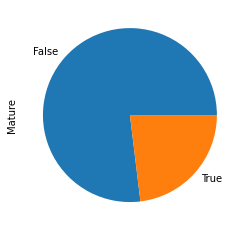

In [111]:
fig, ax = plt.subplots()
df['Mature'].value_counts().plot(ax=ax, kind='pie')

<AxesSubplot:>

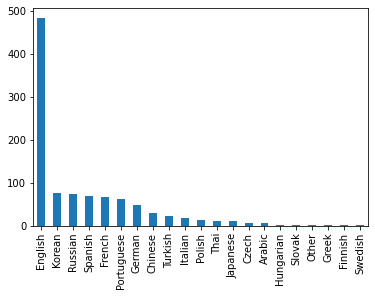

In [114]:
fig, ax = plt.subplots()
df['Language'].value_counts().plot(ax=ax, kind='bar')

<AxesSubplot:ylabel='Language'>

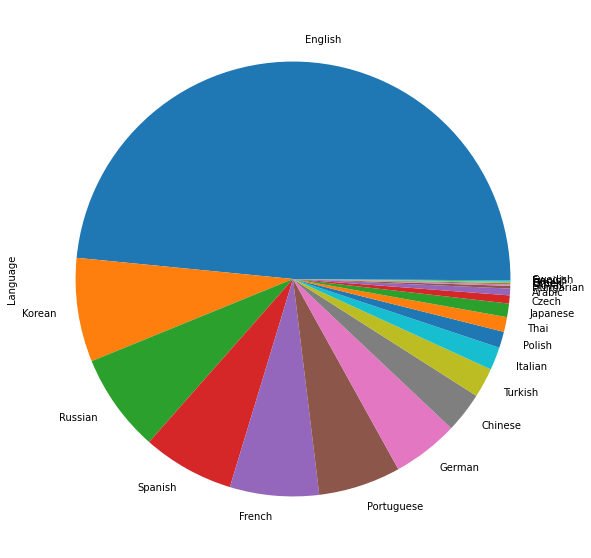

In [119]:
fig, ax = plt.subplots()
df['Language'].value_counts().plot(ax=ax, kind='pie', figsize=(10, 10))

Text(0, 0.5, 'Followers')

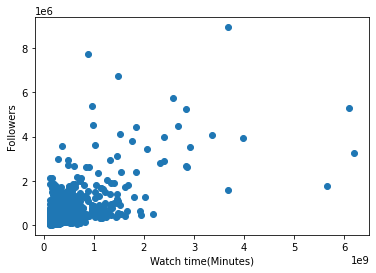

In [98]:
plt.scatter(df['Watch time(Minutes)'],df['Followers'])
plt.xlabel('Watch time(Minutes)')
plt.ylabel('Followers')

Text(0, 0.5, 'Stream time(minutes)')

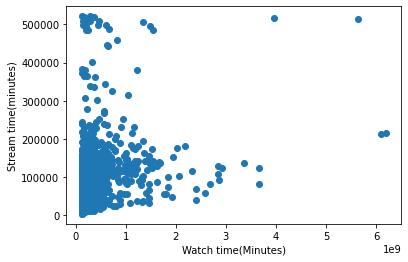

In [120]:
plt.scatter(df['Watch time(Minutes)'],df['Stream time(minutes)'])
plt.xlabel('Watch time(Minutes)')
plt.ylabel('Stream time(minutes)')

Text(0, 0.5, 'Average viewers')

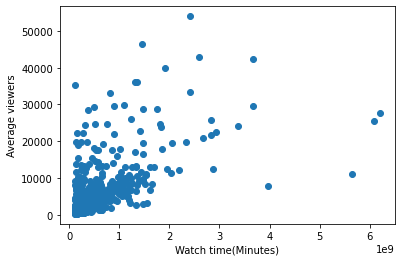

In [100]:
plt.scatter(df['Watch time(Minutes)'],df['Average viewers'])
plt.xlabel('Watch time(Minutes)')
plt.ylabel('Average viewers')

Text(0, 0.5, 'Partnered')

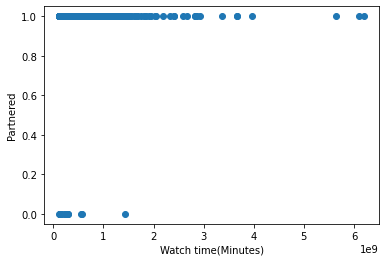

In [124]:
plt.scatter(df['Watch time(Minutes)'],df['Partnered'])
plt.xlabel('Watch time(Minutes)')
plt.ylabel('Partnered')

Text(0, 0.5, 'Language')

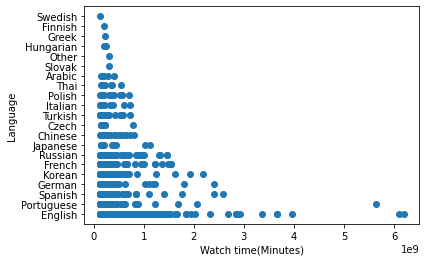

In [102]:
plt.scatter(df['Watch time(Minutes)'],df['Language'])
plt.xlabel('Watch time(Minutes)')
plt.ylabel('Language')

Text(0, 0.5, 'Followers')

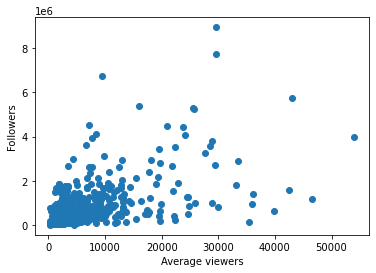

In [103]:
plt.scatter(df['Average viewers'],df['Followers'])
plt.xlabel('Average viewers')
plt.ylabel('Followers')

Text(0, 0.5, 'Language')

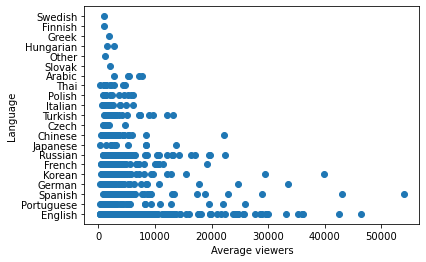

In [104]:
plt.scatter(df['Average viewers'],df['Language'])
plt.xlabel('Average viewers')
plt.ylabel('Language')

Text(0, 0.5, 'Stream time(minutes)')

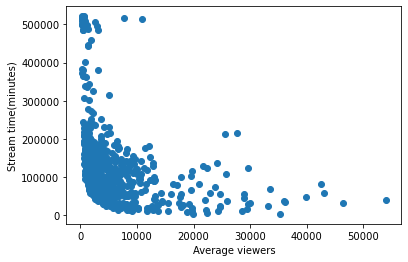

In [105]:
plt.scatter(df['Average viewers'],df['Stream time(minutes)'])
plt.xlabel('Average viewers')
plt.ylabel('Stream time(minutes)')         

Text(0, 0.5, 'Partnered')

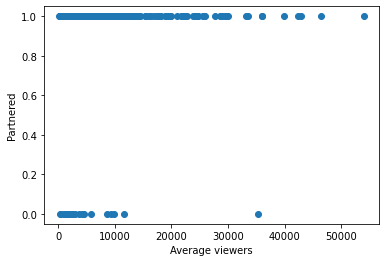

In [107]:
plt.scatter(df['Average viewers'],df['Partnered'])
plt.xlabel('Average viewers')
plt.ylabel('Partnered')         

Text(0, 0.5, 'Stream time(minutes)')

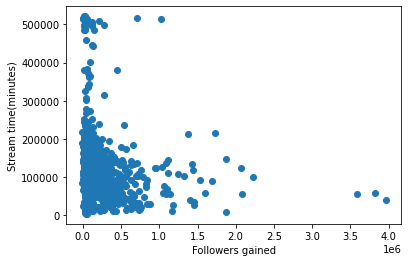

In [125]:
plt.scatter(df['Followers gained'],df['Stream time(minutes)'])
plt.xlabel('Followers gained')
plt.ylabel('Stream time(minutes)')

Text(0, 0.5, 'Watch time(Minutes)')

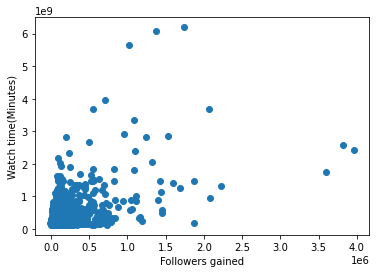

In [127]:
plt.scatter(df['Followers gained'],df['Watch time(Minutes)'])
plt.xlabel('Followers gained')
plt.ylabel('Watch time(Minutes)')

Text(0, 0.5, 'Average viewers')

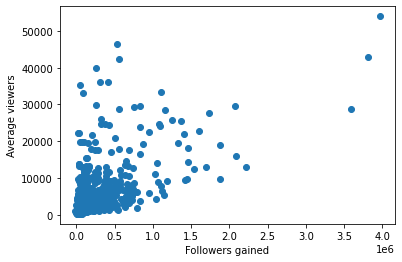

In [128]:
plt.scatter(df['Followers gained'],df['Average viewers'])
plt.xlabel('Followers gained')
plt.ylabel('Average viewers')

Text(0, 0.5, 'Peak viewers')

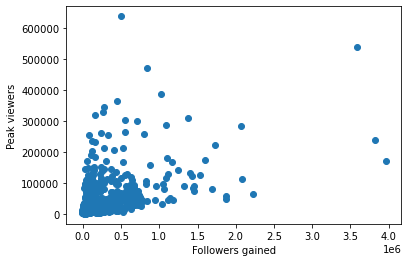

In [129]:
plt.scatter(df['Followers gained'],df['Peak viewers'])
plt.xlabel('Followers gained')
plt.ylabel('Peak viewers')

Text(0, 0.5, 'Followers')

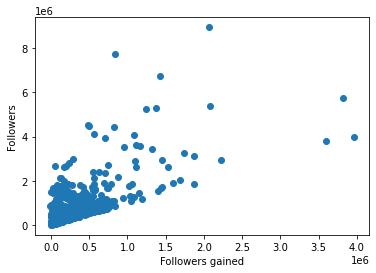

In [130]:
plt.scatter(df['Followers gained'],df['Followers'])
plt.xlabel('Followers gained')
plt.ylabel('Followers')

Text(0, 0.5, 'Views gained')

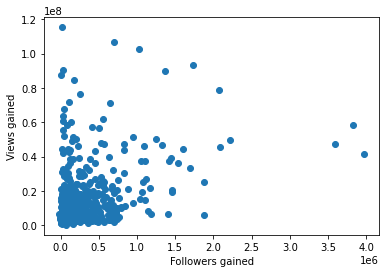

In [131]:
plt.scatter(df['Followers gained'],df['Views gained'])
plt.xlabel('Followers gained')
plt.ylabel('Views gained')

Text(0, 0.5, 'Partnered')

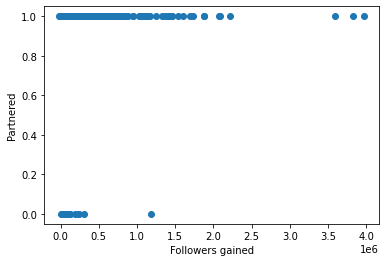

In [132]:
plt.scatter(df['Followers gained'],df['Partnered'])
plt.xlabel('Followers gained')
plt.ylabel('Partnered')

Text(0, 0.5, 'Mature')

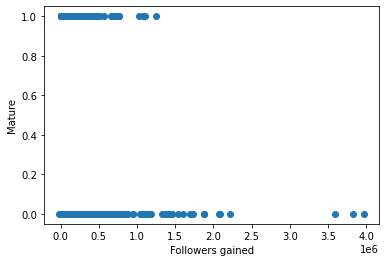

In [133]:
plt.scatter(df['Followers gained'],df['Mature'])
plt.xlabel('Followers gained')
plt.ylabel('Mature')

Text(0, 0.5, 'Language')

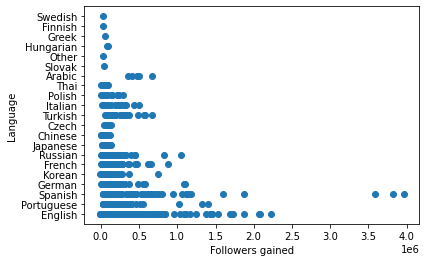

In [134]:
plt.scatter(df['Followers gained'],df['Language'])
plt.xlabel('Followers gained')
plt.ylabel('Language')

Text(0, 0.5, 'Watch time(Minutes)')

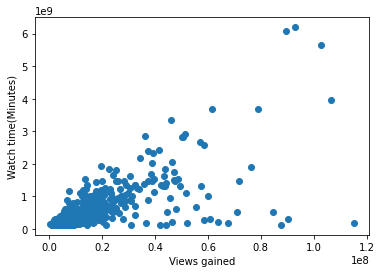

In [135]:
plt.scatter(df['Views gained'],df['Watch time(Minutes)'])
plt.xlabel('Views gained')
plt.ylabel('Watch time(Minutes)')

Text(0, 0.5, 'Stream time(minutes)')

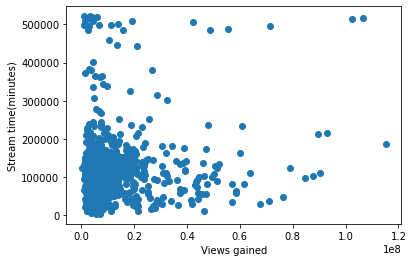

In [136]:
plt.scatter(df['Views gained'],df['Stream time(minutes)'])
plt.xlabel('Views gained')
plt.ylabel('Stream time(minutes)')

Text(0, 0.5, 'Peak viewers')

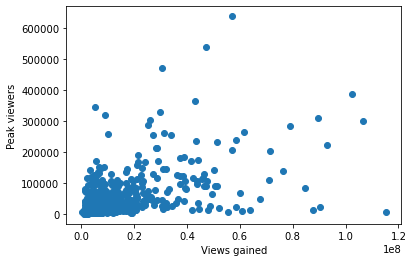

In [137]:
plt.scatter(df['Views gained'],df['Peak viewers'])
plt.xlabel('Views gained')
plt.ylabel('Peak viewers')

Text(0, 0.5, 'Average viewers')

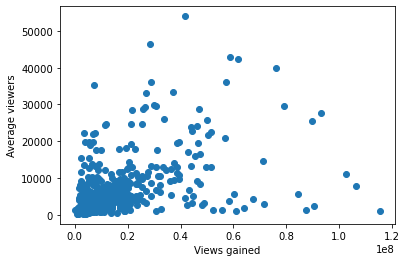

In [138]:
plt.scatter(df['Views gained'],df['Average viewers'])
plt.xlabel('Views gained')
plt.ylabel('Average viewers')

Text(0, 0.5, 'Followers')

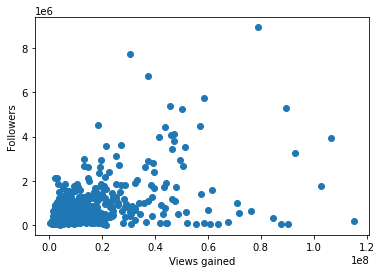

In [139]:
plt.scatter(df['Views gained'],df['Followers'])
plt.xlabel('Views gained')
plt.ylabel('Followers')

Text(0, 0.5, 'Followers gained')

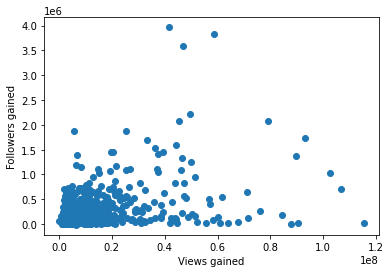

In [140]:
plt.scatter(df['Views gained'],df['Followers gained'])
plt.xlabel('Views gained')
plt.ylabel('Followers gained')

Text(0, 0.5, 'Partnered')

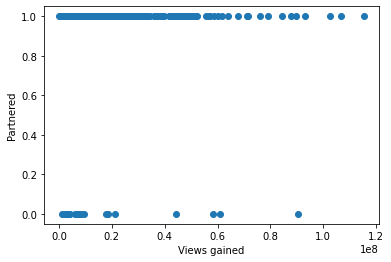

In [141]:
plt.scatter(df['Views gained'],df['Partnered'])
plt.xlabel('Views gained')
plt.ylabel('Partnered')

Text(0, 0.5, 'Mature')

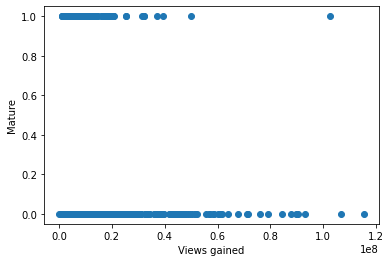

In [142]:
plt.scatter(df['Views gained'],df['Mature'])
plt.xlabel('Views gained')
plt.ylabel('Mature')